# TRUNG BÌNH GIÁ (PRICE) VÀ PHẦN TRĂM THAY ĐỔI (CHANGE %)

Thư viện sử dụng:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from IPython.display import display


Đọc dữ liệu từ file

In [4]:
df = pd.read_csv("merged_data.csv")
df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.        float64
Change %    float64
XSTC         object
dtype: object

## 1/ Trung bình bao lâu thì giá cổ phiếu các ngân hàng đạt giá trị trung bình? nói lên điều gì?


In [23]:
banks = df['XSTC'].unique()
days_banks = []
# Tính giá trị trung bình của price cho từng ngân hàng theo từng năm
average_prices_by_year = df.groupby(['XSTC', df['Date']])['Price'].mean()

# Biến đổi dữ liệu thành một DataFrame để dễ quản lý
average_prices_by_year_df = average_prices_by_year.reset_index(name='Average Price')
average_prices_by_year_df.sample

<bound method NDFrame.sample of      XSTC        Date  Average Price
0     AGR  2018-06-05         3592.5
1     AGR  2018-06-06         3612.1
2     AGR  2018-06-07         3641.7
3     AGR  2018-06-08         3562.9
4     AGR  2018-06-11         3533.4
...   ...         ...            ...
7445  VCB  2024-05-15        91000.0
7446  VCB  2024-05-16        92600.0
7447  VCB  2024-05-17        91800.0
7448  VCB  2024-05-20        91900.0
7449  VCB  2024-05-21        91500.0

[7450 rows x 3 columns]>

### Biểu đồ biến động giá cổ phiếu, giá trị trung bình giá cổ phiếu của các ngân hàng:

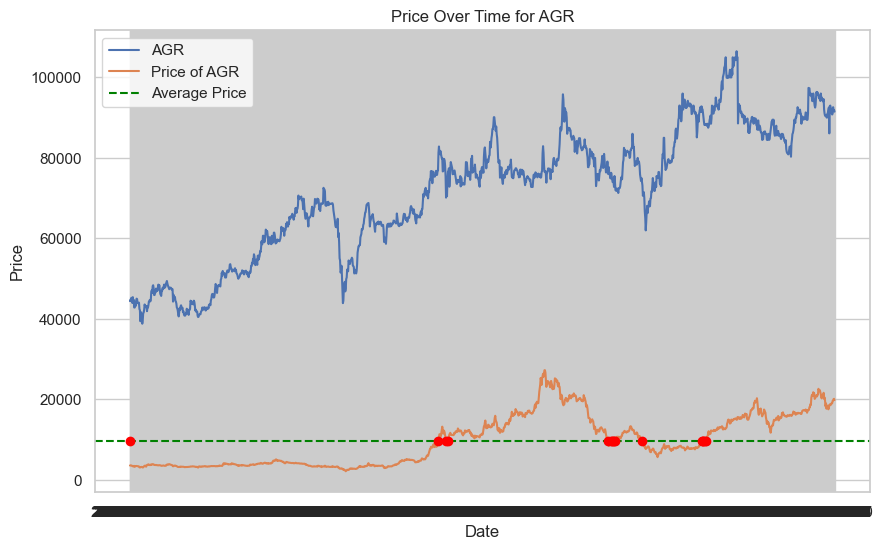

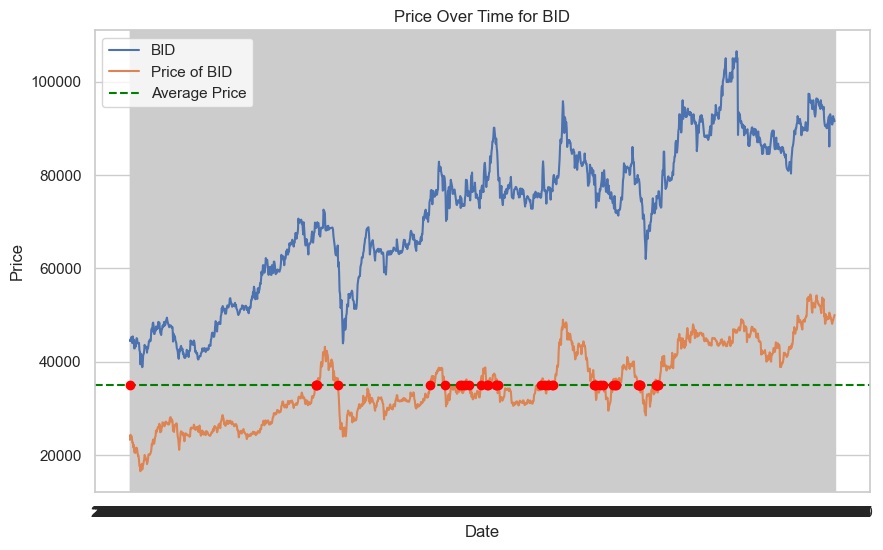

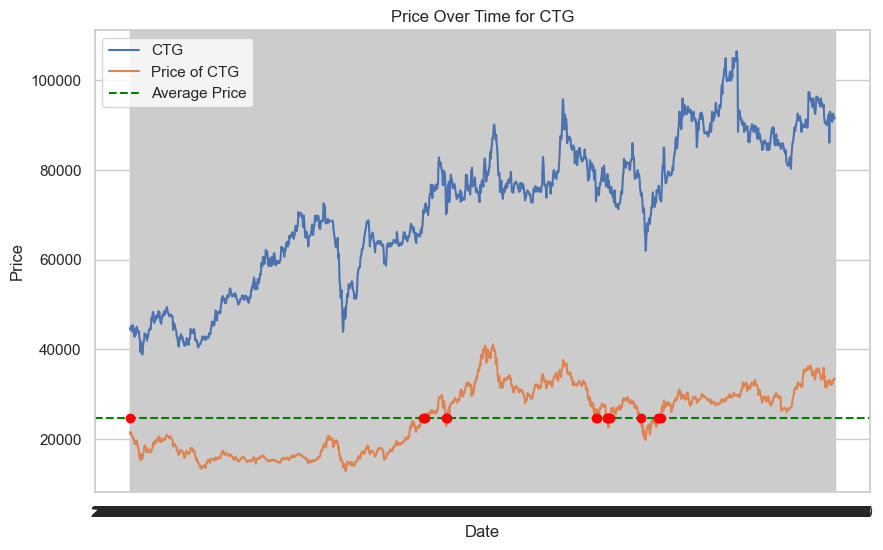

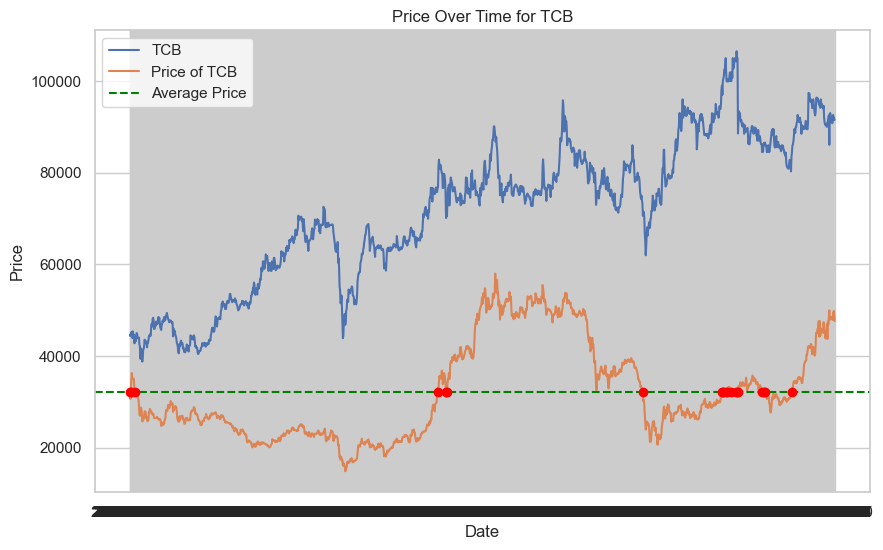

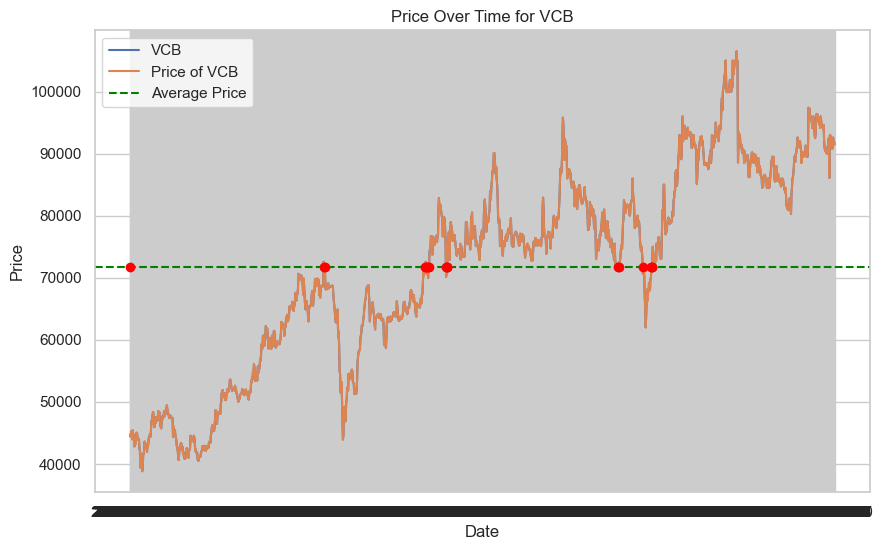

C:\Users\Admin\AppData\Local\Temp\ipykernel_11356\3356641050.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=average_price.values, x=average_price.index, palette='viridis')


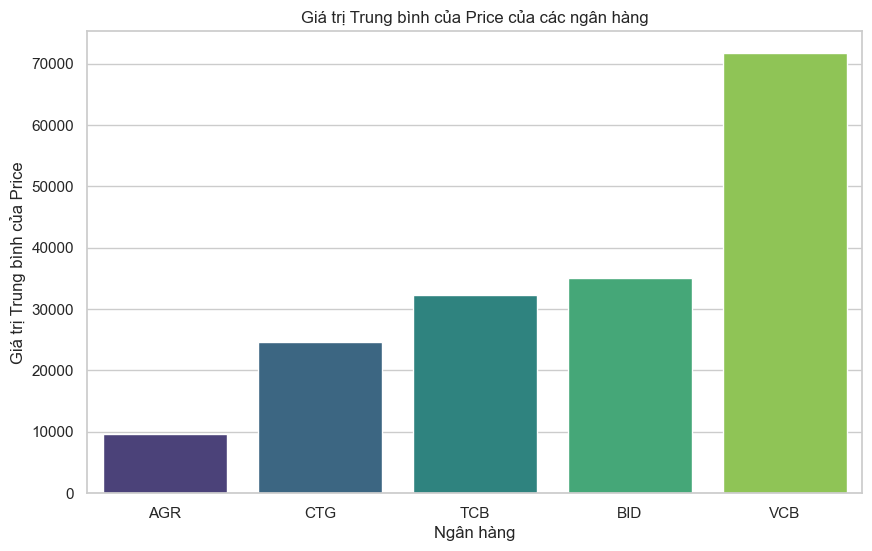

In [27]:
banks = df['XSTC'].unique()
days_banks = []
# Tính giá trị trung bình của price cho từng ngân hàng theo từng năm
average_prices_by_year = df.groupby(['XSTC', df['Date']])['Price'].mean()

# Biến đổi dữ liệu thành một DataFrame để dễ quản lý
average_prices_by_year_df = average_prices_by_year.reset_index(name='Average Price')
average_prices_by_year_df.sample
# Plot separate line charts for each bank
for bank in banks:
    bank_data = df[df['XSTC'] == bank]

    average_price = bank_data['Price'].mean()
    days_above_average = (bank_data['Price'] > average_price).sum()
    days_below_average = (bank_data['Price'] < average_price).sum()
    # Tìm các điểm cắt giữa giá cổ phiếu và đường trung bình
    crossing_points = bank_data[(bank_data['Price'] > average_price) != (bank_data['Price'] > average_price).shift(1)]

    y_value = np.full((crossing_points.shape[0],), average_price)

    days_banks.append([days_above_average, days_below_average, (pd.to_datetime(crossing_points['Date'])).diff().mean(),crossing_points.shape[0], average_price, bank])
    plt.figure(figsize=(10, 6))
    plt.plot(bank_data1['Date'], bank_data1['Average Price'], label=bank)
    plt.plot(bank_data['Date'], bank_data['Price'], label=f'Price of {bank}')
    plt.axhline(y=average_price, color='green', linestyle='--', label='Average Price')

    plt.scatter(crossing_points['Date'], y_value, color='red', zorder=5)

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Price Over Time for {bank}')
    plt.legend()

# Show the plot after looping through all banks
plt.show()

# Tính giá trị trung bình của price cho từng ngân hàng
average_price = df.groupby('XSTC')['Price'].mean().sort_values()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(y=average_price.values, x=average_price.index, palette='viridis')

# Thiết lập tiêu đề và nhãn
plt.ylabel('Giá trị Trung bình của Price')
plt.xlabel('Ngân hàng')
plt.title('Giá trị Trung bình của Price của các ngân hàng')

# Hiển thị biểu đồ
plt.show()


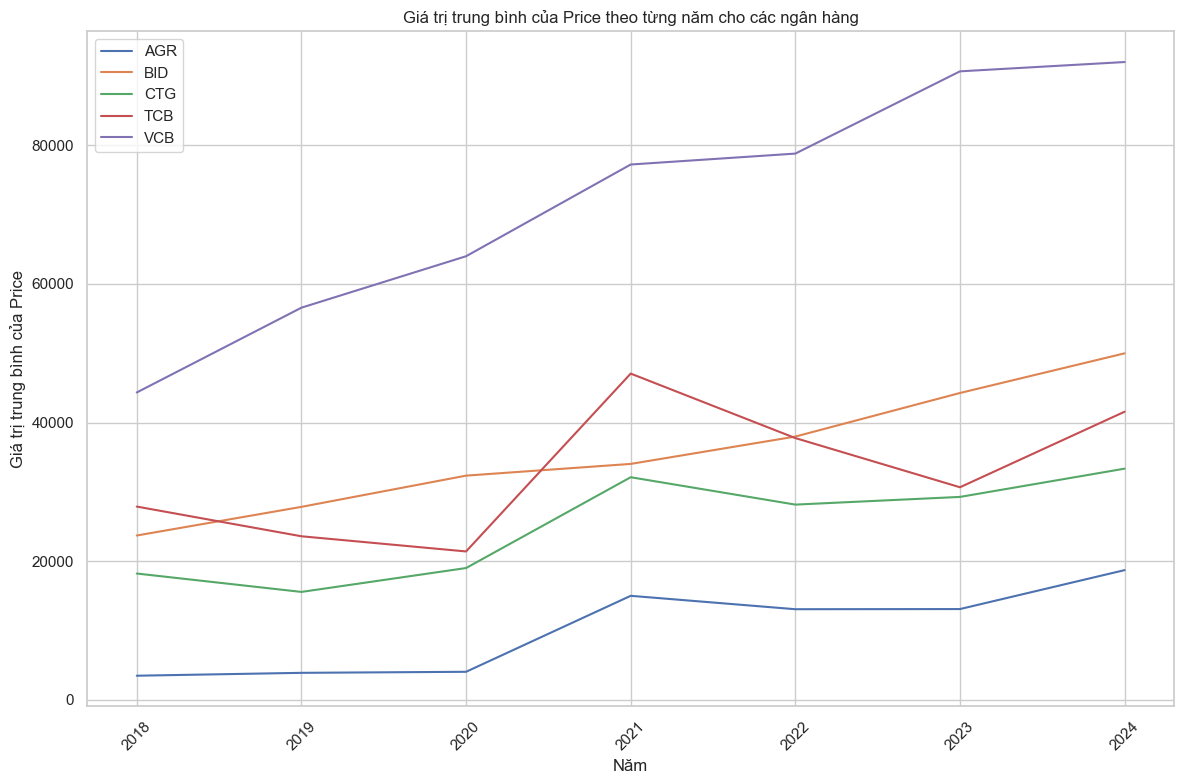

In [14]:
# Đọc dữ liệu từ DataFrame
df = pd.read_csv('merged_data.csv')

# Tính giá trị trung bình của price cho từng ngân hàng theo từng năm
average_prices_by_year = df.groupby(['XSTC', df['Date'].str[:4]])['Price'].mean()

# Biến đổi dữ liệu thành một DataFrame để dễ quản lý
average_prices_by_year_df = average_prices_by_year.reset_index(name='Average Price')

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))

# Lặp qua từng ngân hàng
for bank in average_prices_by_year_df['XSTC'].unique():
    bank_data = average_prices_by_year_df[average_prices_by_year_df['XSTC'] == bank]
    plt.plot(bank_data['Date'], bank_data['Average Price'], label=bank)

# Đặt tiêu đề và nhãn
plt.title('Giá trị trung bình của Price theo từng năm cho các ngân hàng')
plt.xlabel('Năm')
plt.ylabel('Giá trị trung bình của Price')
plt.legend()

# Hiển thị biểu đồ
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Giá trung bình (price) có tác dụng làm điểm tham chiếu để so sánh với giá cổ phiếu hiện tại. Nếu giá cổ phiếu hiện tại cao hơn giá trị trung bình, có thể cho thấy sự tăng trưởng hoặc biến động ngắn hạn; ngược lại, nếu giá cổ phiếu thấp hơn giá trị trung bình, có thể cho thấy sự giảm giá(cơ hội mua vào).

Giá trị trung bình là 1 đại lượng phản chiếu 1 phần giá trị thực của cổ phiếu. Nếu giá trị trung bình cao hơn thì có thể giá trị thực của cổ phiếu cũng cao hơn.

In [6]:
for item in days_banks:
    if pd.isna(item[2]):
        item[2] = 0
    else:
        item[2] = item[2].days


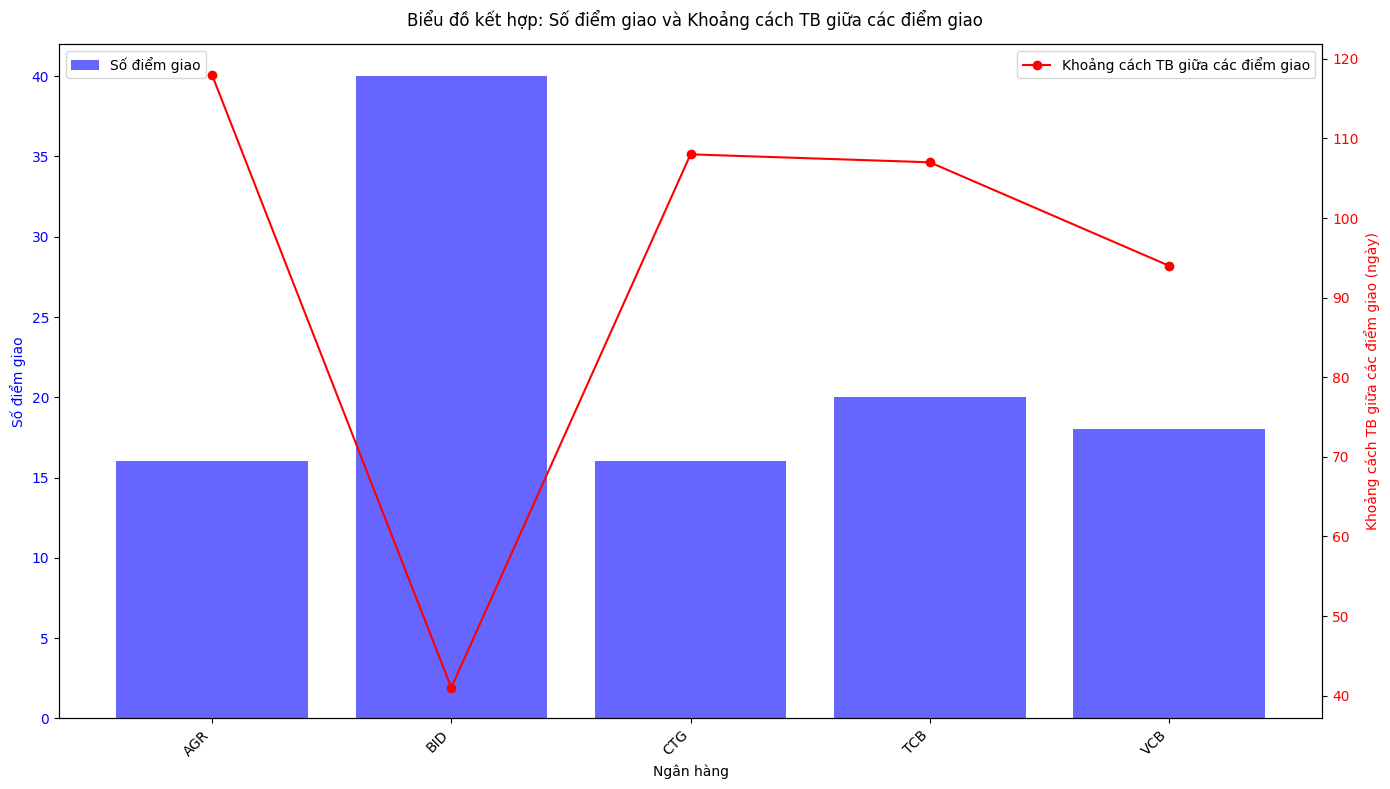

In [7]:
# Tạo danh sách chứa tên các ngân hàng
bank_names = [item[5] for item in days_banks]

# Tạo danh sách chứa các giá trị cần vẽ
mean_date_diff = [item[2] for item in days_banks]
crossing_points_count = [item[3] for item in days_banks]

# Thiết lập biểu đồ
fig, ax1 = plt.subplots(figsize=(14, 8))

# Vẽ biểu đồ cột cho số điểm giao
ax1.bar(bank_names, crossing_points_count, color='b', alpha=0.6, label='Số điểm giao')
ax1.set_xlabel('Ngân hàng')
ax1.set_ylabel('Số điểm giao', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Thiết lập trục x
ax1.set_xticks(range(len(bank_names)))
ax1.set_xticklabels(bank_names, rotation=45, ha='right')

# Tạo trục y thứ hai để vẽ biểu đồ đường cho khoảng cách trung bình giữa các điểm giao
ax2 = ax1.twinx()
ax2.plot(bank_names, mean_date_diff, color='r', marker='o', linestyle='-', label='Khoảng cách TB giữa các điểm giao')
ax2.set_ylabel('Khoảng cách TB giữa các điểm giao (ngày)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Thêm tiêu đề và legend
fig.suptitle('Biểu đồ kết hợp: Số điểm giao và Khoảng cách TB giữa các điểm giao')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


Số điểm giao và trung bình khoảng cách các điểm giao tỉ lệ nghịch nhau.

Tuy nhiên trên biểu đồ có 1 điểm Outline là TCB


## Biến động của Change (%) theo thời gian của các ngân hàng

Ngân hàng có sự thay đổi trung bình lớn nhất: AGR với giá trị trung bình 0.16%
Ngân hàng: AGR với giá trị trung bình 0.16%
Ngân hàng: BID với giá trị trung bình 0.08%
Ngân hàng: CTG với giá trị trung bình 0.06%
Ngân hàng: TCB với giá trị trung bình 0.05%
Ngân hàng: VCB với giá trị trung bình 0.06%


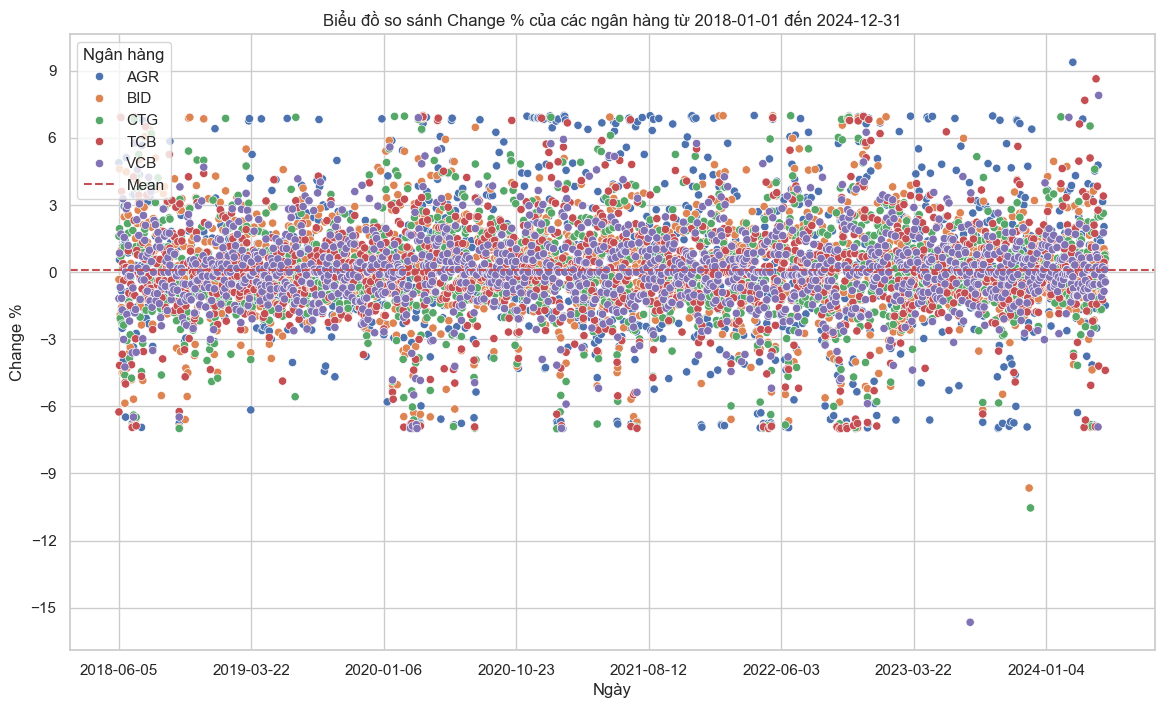

In [8]:
# Đặt khoảng thời gian
start_date = '2018-01-01'
end_date = '2024-12-31'

# Lọc dữ liệu theo khoảng thời gian
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
filtered_df = df[mask]

# Thiết lập phong cách cho biểu đồ
sns.set(style='whitegrid')

# Vẽ biểu đồ phân tán
plt.figure(figsize=(14, 8))
scatter_plot = sns.scatterplot(data=filtered_df, x='Date', y='Change %', hue='XSTC', palette='deep')

# Thiết lập các nhãn và tiêu đề
scatter_plot.set_ylabel('Change %')
scatter_plot.set_xlabel('Ngày')
scatter_plot.set_title('Biểu đồ so sánh Change % của các ngân hàng từ ' + start_date + ' đến ' + end_date)

# Tính giá trị trung bình của Change % cho từng ngân hàng
average_change = filtered_df.groupby('XSTC')['Change %'].mean()
mean_value = average_change.mean()
# Xác định ngân hàng có giá trị trung bình lớn nhất
max_avg_change_bank = average_change.idxmax()
max_avg_change_value = average_change.max()

print(f"Ngân hàng có sự thay đổi trung bình lớn nhất: {max_avg_change_bank} với giá trị trung bình {max_avg_change_value:.2f}%")
for bank, change_value in average_change.items():
    print(f"Ngân hàng: {bank} với giá trị trung bình {change_value:.2f}%")
# Giảm số lượng ticks trên trục x để dễ nhìn hơn
scatter_plot.xaxis.set_major_locator(plt.MaxNLocator(10))
scatter_plot.yaxis.set_major_locator(plt.MaxNLocator(10))

plt.axhline(y=mean_value, color='r', linestyle='--', label='Mean')

# Hiển thị legend
plt.legend(title='Ngân hàng', loc='upper left')

# Hiển thị biểu đồ
plt.show()


In [9]:
# Đặt khoảng thời gian
start_year = 2018
end_year = 2024

# Tạo một DataFrame trống để lưu dữ liệu
data_list = []

# Lặp qua từng năm
for year in range(start_year, end_year + 1):
    # Lọc dữ liệu theo năm
    start_date = f"{year}-01-01"
    end_date = f"{year}-12-31"
    mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    filtered_df = df[mask]

    # Tính giá trị trung bình của Change % cho từng ngân hàng trong năm đó
    average_change = filtered_df.groupby('XSTC')['Change %'].mean()

    # Lưu dữ liệu vào danh sách
    for bank, avg_change in average_change.items():
        data_list.append({
            'Bank': bank,
            'Year': year,
            'Average Change': avg_change
        })

# Tạo DataFrame từ danh sách dữ liệu
df_to_save = pd.DataFrame(data_list)

# Lưu DataFrame vào file CSV
csv_filename = 'average_change_data.csv'
df_to_save.to_csv(csv_filename, index=False)
print(f"Dữ liệu đã được lưu vào file CSV: {csv_filename}")


Dữ liệu đã được lưu vào file CSV: average_change_data.csv


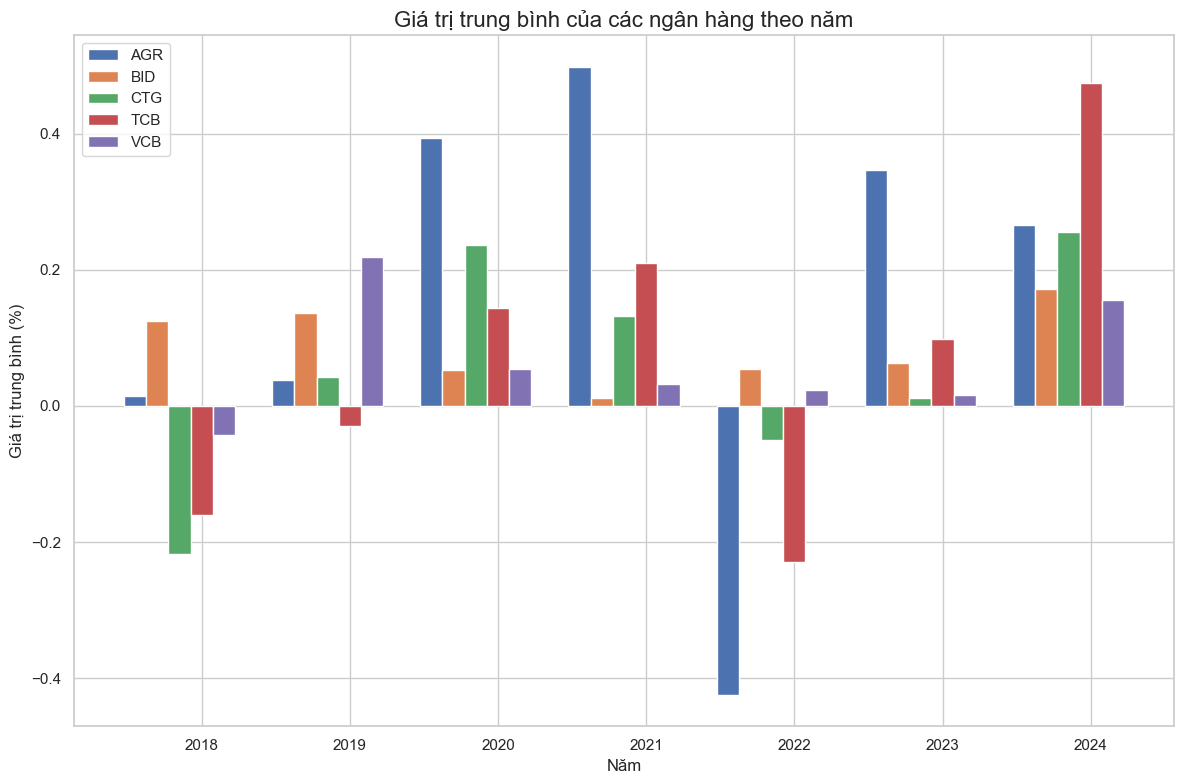

In [10]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('average_change_data.csv')

# Tạo một dictionary rỗng để lưu dữ liệu
average_prices = {}

# Lặp qua từng dòng trong DataFrame và thêm dữ liệu vào dictionary
for index, row in df.iterrows():
    bank = row['Bank']
    year = row['Year']
    average_change = row['Average Change']
    
    if bank not in average_prices:
        average_prices[bank] = {}
    
    average_prices[bank][year] = average_change


# Tạo các dữ liệu cần thiết cho biểu đồ cột
years = list(average_prices["AGR"].keys())
banks = list(average_prices.keys())
num_years = len(years)
bar_width = 0.15
index = np.arange(num_years)

# Tạo biểu đồ cột
fig, ax = plt.subplots(figsize=(12, 8))

for i, bank in enumerate(banks):
    avg_prices = [average_prices[bank][year] for year in years]
    ax.bar(index + i * bar_width, avg_prices, bar_width, label=bank)

# Đặt tiêu đề và nhãn trục
ax.set_title('Giá trị trung bình của các ngân hàng theo năm', fontsize=16)
ax.set_xlabel('Năm')
ax.set_ylabel('Giá trị trung bình (%)')

# Đặt các chỉ mục cho nhãn trục x và hiển thị nhãn trục x
ax.set_xticks(index + bar_width * (num_years - 1) / 2)
ax.set_xticklabels(years)

# Hiển thị chú thích
ax.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


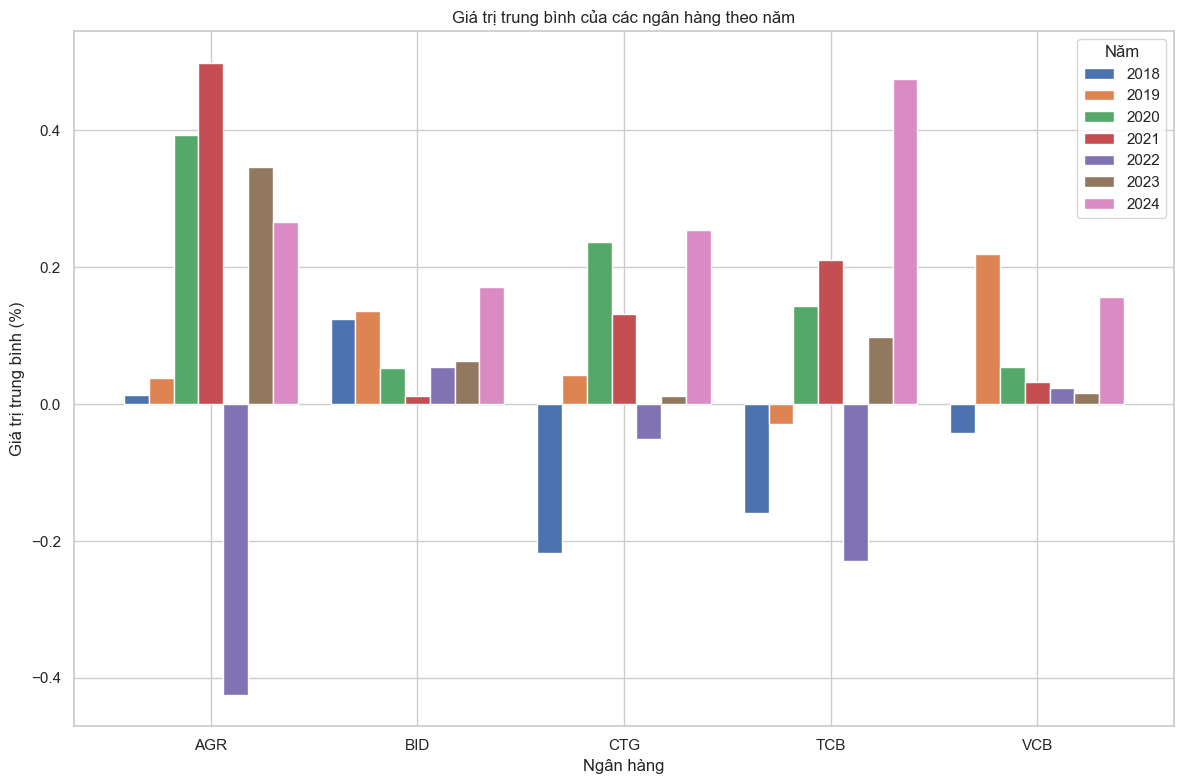

In [11]:
# Tạo biểu đồ cột
fig, ax = plt.subplots(figsize=(12, 8))


# Tạo danh sách các ngân hàng và các năm
banks = df['Bank'].unique()
years = df['Year'].unique()
num_banks = len(banks)
bar_width = 0.12
index = np.arange(num_banks)

# Vẽ cột cho mỗi năm
for i, year in enumerate(years):
    avg_prices = df[df['Year'] == year]['Average Change'].values
    ax.bar(index + i * bar_width, avg_prices, bar_width, label=year)

# Đặt nhãn và chú thích
ax.set_xlabel('Ngân hàng')
ax.set_ylabel('Giá trị trung bình (%)')
ax.set_title('Giá trị trung bình của các ngân hàng theo năm')
ax.set_xticks(index + (len(years) - 1) * bar_width / 2)
ax.set_xticklabels(banks)
ax.legend(title='Năm')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [12]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('average_change_data.csv')

# Tạo hàm để vẽ biểu đồ
def plot_chart(year=None, bank=None):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    if year:
        df_year = df[df['Year'] == year]
        banks = df_year['Bank'].unique()
        index = np.arange(len(banks))
        bar_width = 0.35
        for i, bank in enumerate(banks):
            avg_prices = df_year[df_year['Bank'] == bank]['Average Change'].values
            ax.bar(index[i], avg_prices, bar_width, label=bank)
        ax.set_xticks(index)
        ax.set_xticklabels(banks)
        ax.set_title(f'Giá trị trung bình của các ngân hàng năm {year}')
    elif bank:
        df_bank = df[df['Bank'] == bank]
        years = df_bank['Year'].unique()
        index = np.arange(len(years))
        bar_width = 0.35
        for i, year in enumerate(years):
            avg_price = df_bank[df_bank['Year'] == year]['Average Change'].values[0]
            ax.bar(index[i], avg_price, bar_width, label=year)
        ax.set_xticks(index)
        ax.set_xticklabels(years)
        ax.set_title(f'Giá trị trung bình của ngân hàng {bank} qua các năm')
    ax.set_xlabel('Năm hoặc Ngân hàng')
    ax.set_ylabel('Giá trị trung bình (%)')
    ax.legend()
    plt.show()

# Tạo dropdown để chọn năm
year_dropdown = widgets.Dropdown(
    options=list(df['Year'].unique()),
    description='Năm:',
    disabled=False,
)

# Tạo dropdown để chọn ngân hàng
bank_dropdown = widgets.Dropdown(
    options=list(df['Bank'].unique()),
    description='Ngân hàng:',
    disabled=False,
)

# Tạo button để vẽ biểu đồ theo năm
year_button = widgets.Button(description="Vẽ theo Năm")

# Tạo button để vẽ biểu đồ theo ngân hàng
bank_button = widgets.Button(description="Vẽ theo Ngân hàng")

# Hàm xử lý sự kiện khi nhấn nút vẽ theo năm
def on_year_button_clicked(b):
    plot_chart(year=year_dropdown.value)

# Hàm xử lý sự kiện khi nhấn nút vẽ theo ngân hàng
def on_bank_button_clicked(b):
    plot_chart(bank=bank_dropdown.value)

# Gán hàm xử lý sự kiện cho các nút
year_button.on_click(on_year_button_clicked)
bank_button.on_click(on_bank_button_clicked)

# Hiển thị các widget và nút
display(year_dropdown, year_button)
display(bank_dropdown, bank_button)


Dropdown(description='Năm:', options=(2018, 2019, 2020, 2021, 2022, 2023, 2024), value=2018)

Button(description='Vẽ theo Năm', style=ButtonStyle())

Dropdown(description='Ngân hàng:', options=('AGR', 'BID', 'CTG', 'TCB', 'VCB'), value='AGR')

Button(description='Vẽ theo Ngân hàng', style=ButtonStyle())

## Nhận xét và phân tích sự thay đổi trung bình của các ngân hàng theo thời gian
Ngân hàng AGR:<br>

Có sự biến động lớn qua các năm, từ mức thấp nhất là -0.42% năm 2022 đến mức cao nhất là 0.50% năm 2021.<br>
Nhìn chung, giá trị trung bình (change %) của AGR có xu hướng tăng từ năm 2023 trở đi.<br><br>
Ngân hàng BID:<br>

Giá trị trung bình khá ổn định với mức tăng trưởng nhẹ qua các năm, dao động từ 0.01% đến 0.17%.<br>
Không có năm nào giá trị trung bình (change %) của BID dưới 0.<br><br>
Ngân hàng CTG:<br>

Có một số năm giá trị trung bình (change %) âm như năm 2018 (-0.22%) và 2022 (-0.05%).<br>
Tuy nhiên, từ năm 2020 trở đi, CTG có xu hướng tăng dần, đạt mức cao nhất là 0.26% vào năm 2024.<br><br>
Ngân hàng TCB:<br>

TCB có xu hướng giá trị trung bình (change %) tăng từ năm 2019 (-0.03%) đến 2024 (0.48%).<br>
Đặc biệt, năm 2022 giá trị trung bình (change %) giảm mạnh xuống -0.23% nhưng phục hồi nhanh chóng trong những năm tiếp theo.<br><br>
Ngân hàng VCB:<br>

Giá trị trung bình (change %) của VCB khá ổn định và luôn duy trì ở mức dương, dao động từ 0.02% đến 0.22%.<br>
Đặc biệt, năm 2019 có mức tăng cao nhất là 0.22%.<br><br>
Tổng kết<br>
Xu hướng chung: Phần lớn các ngân hàng có xu hướng tăng giá trị trung bình (change %) qua các năm, đặc biệt là từ năm 2020 trở đi.<br>
Sự biến động: Một số ngân hàng như AGR và CTG có sự biến động mạnh qua các năm, trong khi BID và VCB có xu hướng ổn định hơn.<br>
Năm nổi bật: Năm 2024 là năm mà hầu hết các ngân hàng đều đạt mức giá trị trung bình (change %) cao nhất trong giai đoạn từ 2018 đến 2024.<br>


